Creating the column country. 

In [11]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../air crashes/updated_Airplane_Crashes.csv'
df = pd.read_csv(file_path, encoding='latin1')

In [9]:
# List of U.S. states
us_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", 
    "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", 
    "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", 
    "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", 
    "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", 
    "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", 
    "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Function to modify the Location column directly
def append_usa(location):
    if pd.isnull(location):  # Handle NaN values
        return location
    for state in us_states:
        if state in location:  # Check if any U.S. state is in the location
            if "USA" not in location:  # Avoid duplicate "USA"
                return location + ", USA"
    return location  # Keep the original if not a U.S. state

# Apply the function to the 'Location' column
df['Location'] = df['Location'].apply(append_usa)

# Save the modified DataFrame back to the same file
df.to_csv(file_path, index=False, encoding='latin1')

print("Locations updated with 'USA' where applicable.")


Locations updated with 'USA' where applicable, 'country' column deleted if it existed, and changes saved in the same file.


Replace missed data in the column "time"

In [7]:
# Ensure the `time` column exists (replace 'time' with the actual column name if different)
if 'Time' in df.columns:
    # Fill missing or null values in the 'time' column with '00:00'
    df['Time'] = df['Time'].fillna('00:00')

    # Handle cases where the `time` column might have empty strings
    df['Time'] = df['Time'].replace('', '00:00')

    # Save the changes back to the same file
    df.to_csv(file_path, index=False, encoding='latin1')
else:
    print("The 'Time' column does not exist in the dataset.")

In [8]:
# Define a function to validate time entries
def validate_time(time_str):
    # Regex pattern for valid 24-hour time format (e.g., 23:59 or 23:59:59)
    pattern = r'^([01]?\d|2[0-3]):[0-5]\d(:[0-5]\d)?$'
    if pd.isna(time_str):  # Handle missing values
        return '00:00'
    if re.match(pattern, str(time_str)):  # Check if time matches the pattern
        return time_str
    return '00:00'  # Replace invalid times with '00:00'

# Apply the validation function to the 'time' column
if 'Time' in df.columns:
    df['Time'] = df['Time'].apply(validate_time)
    # Save the changes back to the same file
    df.to_csv(file_path, index=False, encoding='latin1')
    print("Time column validated and saved.")
else:
    print("The 'time' column does not exist in the dataset.")


Time column validated and saved.


In [10]:
# Assuming 'df' is your DataFrame
df.replace('', np.nan, inplace=True)
df.replace('NA', np.nan, inplace=True)  # To handle string representations of missing data
df.replace('na', np.nan, inplace=True)  # To handle other string representations
df.replace('NULL', np.nan, inplace=True)  # If there are any "NULL" string values

# Check if the DataFrame has been updated
print(df.head())


        Date   Time                            Location  \
0  9/17/1908  17:18            Fort Myer, Virginia, USA   
1   9/7/1909  00:00             Juvisy-sur-Orge, France   
2  7/12/1912   6:30      Atlantic City, New Jersey, USA   
3   8/6/1913  00:00  Victoria, British Columbia, Canada   
4   9/9/1913  18:30                  Over the North Sea   

                 Operator Flight #          Route                 AC Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1                     NaN      NaN       Air show          Wright Byplane   
2    Military - U.S. Navy      NaN    Test flight               Dirigible   
3                 Private      NaN            NaN        Curtiss seaplane   
4  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   

  Registration cn/ln  Aboard  Aboard Passangers  Aboard Crew  Fatalities  \
0          NaN     1     2.0                1.0          1.0         1.0   
1          SC1   NaN     1.0  

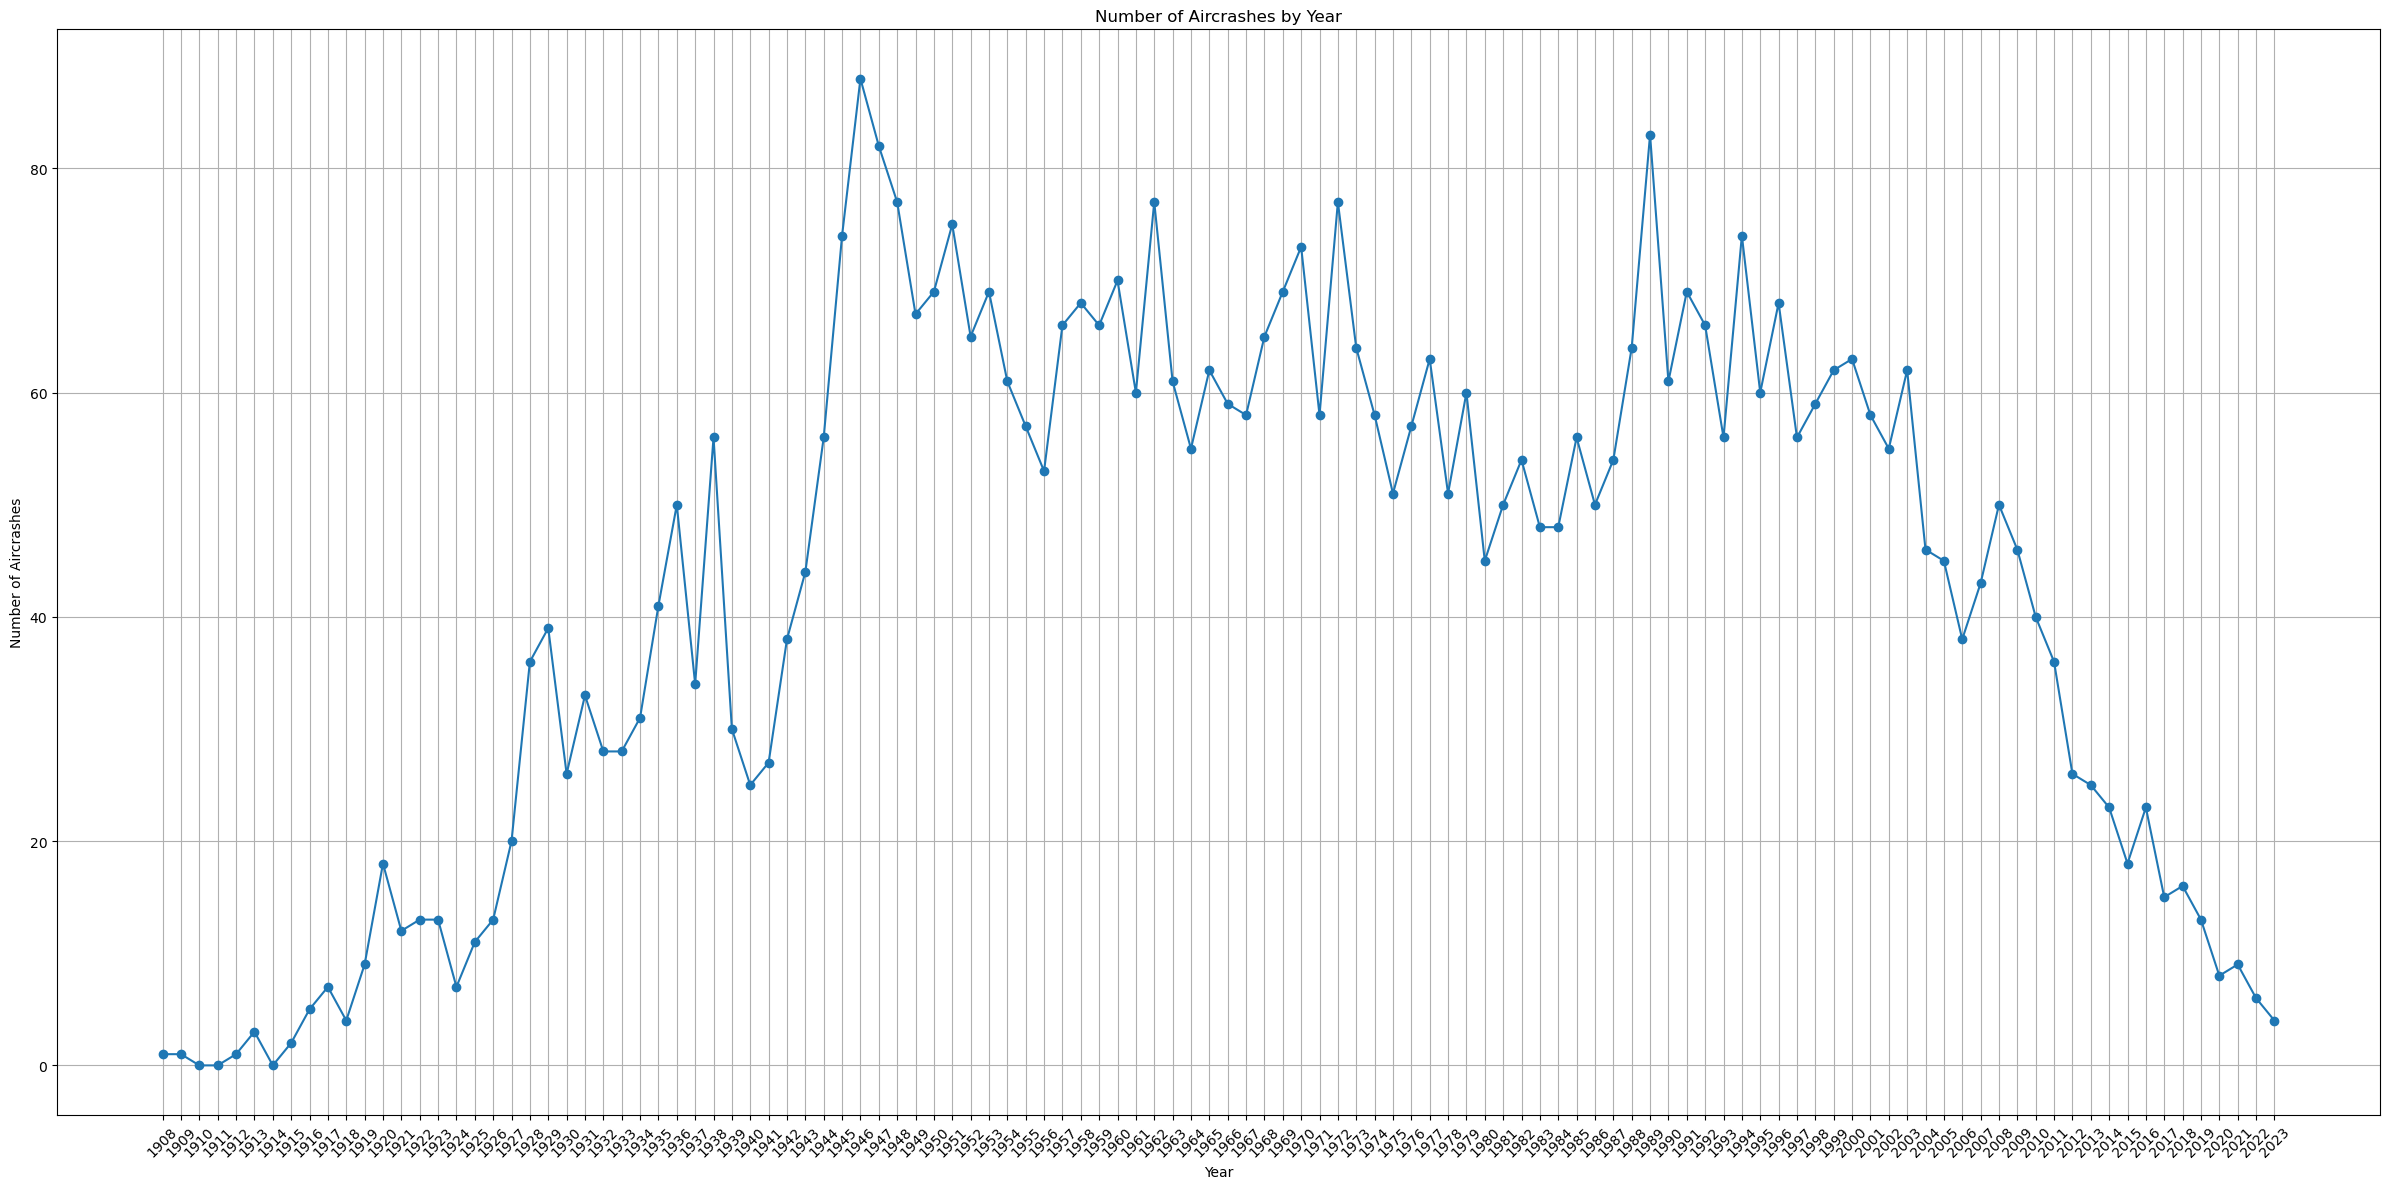

In [22]:
# Convert the date column to datetime format (assuming a 'date' column)
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the date column
df['Year'] = df['Date'].dt.year

# Create a full range of years from the minimum to the maximum year in the dataset
all_years = pd.Series(range(df['Year'].min(), df['Year'].max() + 1))

# Count the number of aircrashes per year and reindex to include all years
aircrashes_per_year = df.groupby('Year').size().reindex(all_years, fill_value=0)

# Visualize the data
plt.figure(figsize=(24, 12))
plt.plot(aircrashes_per_year.index, aircrashes_per_year.values, marker='o')
plt.title('Number of Aircrashes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Aircrashes')
plt.xticks(aircrashes_per_year.index, rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


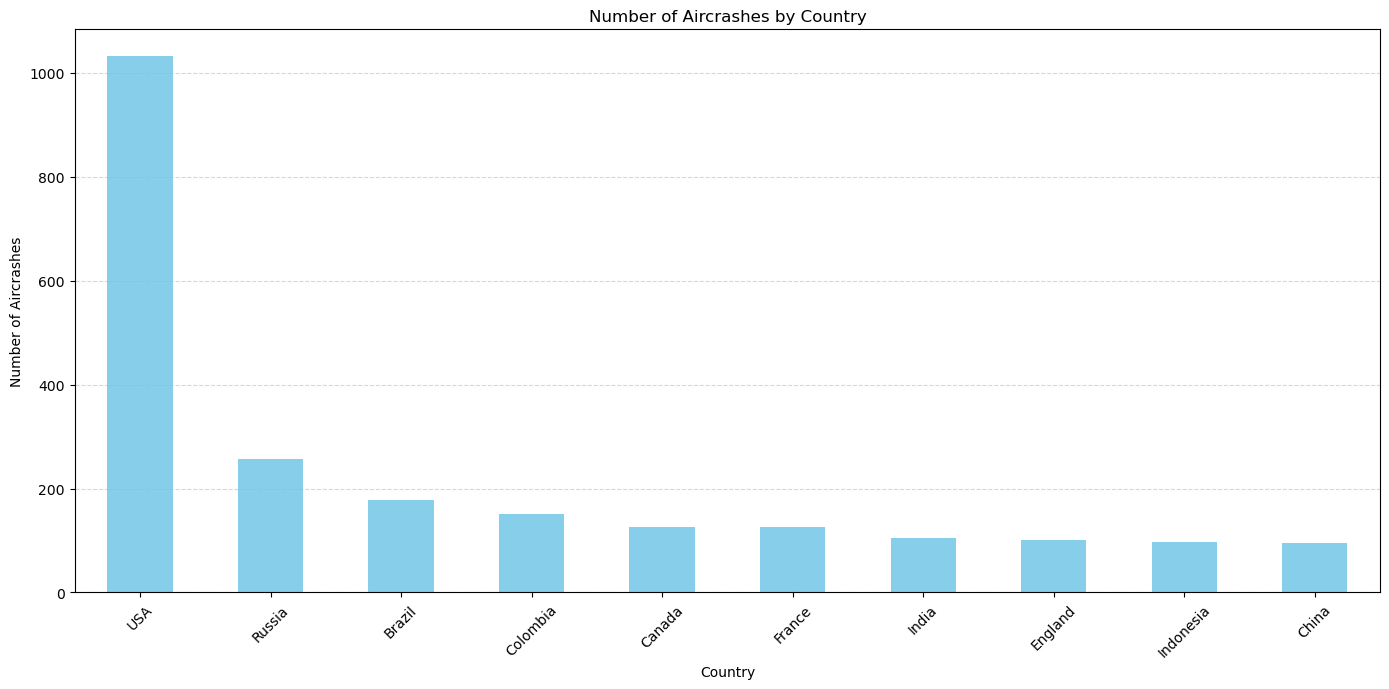

In [23]:
# Extract the country from the 'location' column (assuming the format is "City, Country")
df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip() if pd.notnull(x) else None)

# Group by extracted country and count aircrashes
aircrashes_by_country = df['Country'].value_counts()

# Create a bar plot for the top 10 countries with the most aircrashes
plt.figure(figsize=(14, 7))
aircrashes_by_country.head(10).plot(kind='bar', color='skyblue')
plt.title('Number of Aircrashes by Country')
plt.xlabel('Country')
plt.ylabel('Number of Aircrashes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

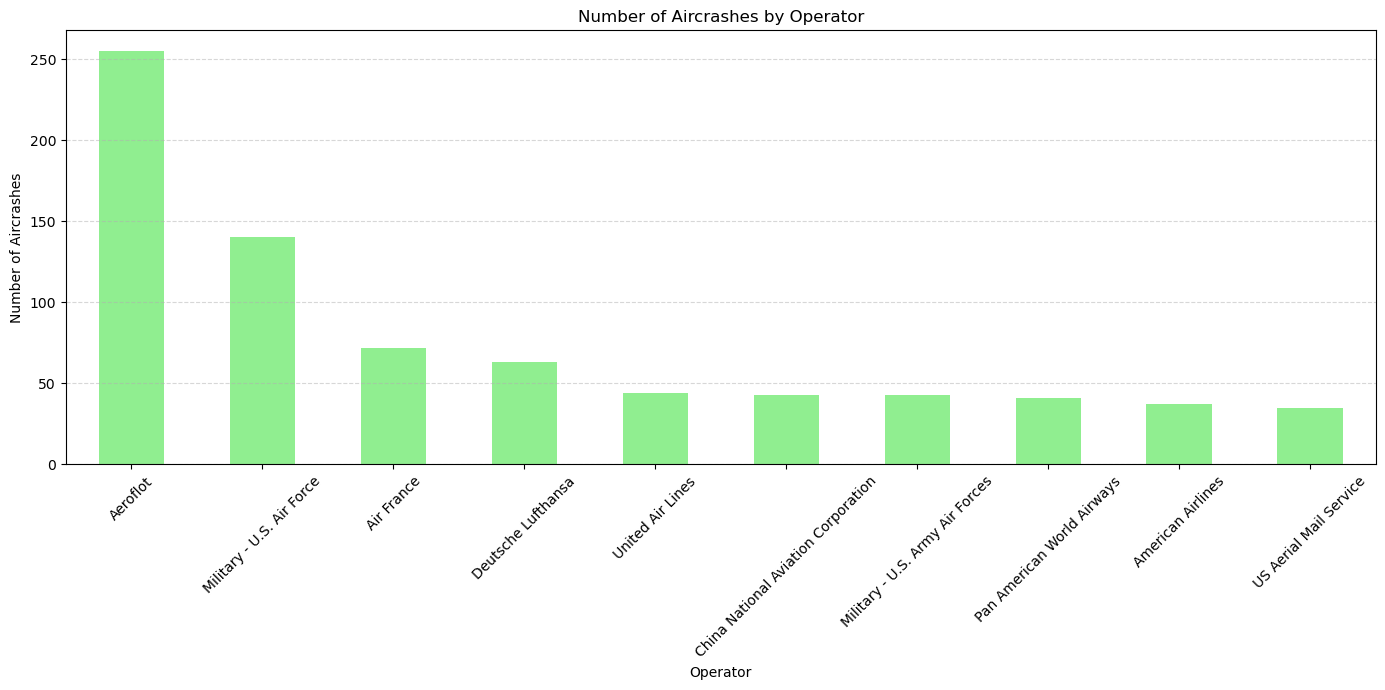

In [24]:
aircrashes_by_operator = df['Operator'].value_counts()

# Create a bar plot for the top 10 operators with the most aircrashes
plt.figure(figsize=(14, 7))
aircrashes_by_operator.head(10).plot(kind='bar', color='lightgreen')
plt.title('Number of Aircrashes by Operator')
plt.xlabel('Operator')
plt.ylabel('Number of Aircrashes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()